## 导入模块

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as ms


import pandas as pd
import xgboost as xgb
import catboost as cb
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error

## 导入完整数据集应用于RR RF

In [10]:
df1 = pd.read_csv('Cdfill.csv')
df2 = pd.read_csv('Asfill.csv')
df3 = pd.read_csv('Pbfill.csv')

x1 = df1.iloc[:,:19]
x1_e = df1.iloc[:,:12]
x1_g = df1.iloc[:,12:19]
y1 = df1.iloc[:,19]


x2 = df2.iloc[:,:19]
x2_e = df2.iloc[:,:12]
x2_g = df2.iloc[:,12:19]
y2 = df2.iloc[:,19]


x3 = df3.iloc[:,:19]
x3_e = df3.iloc[:,:12]
x3_g = df3.iloc[:,12:19]
y3 = df3.iloc[:,19]


In [11]:
df1

,TotalCd,CEC,EC,pH,TOC,Clay,Silt,Sand,TN,Fe,Mn,Ca,T,TS,P,PS,Elevation,Source,Assay,CdGP
0,-1.301030,1.040000,241.20,8.51,1.89,13.45,26.16,60.39,0.038380,37420.0,1694.664,3.14,25.674999,668.038147,170.0,115.708122,41.0,0.0,0,-1.686344
1,-1.096910,2.740000,241.20,7.99,0.31,8.75,9.95,81.30,0.038380,37420.0,1694.664,3.14,25.991667,670.552124,171.0,116.302101,1.0,0.0,0,-1.464858
2,-0.721246,3.620000,241.20,7.96,3.09,24.50,16.00,59.50,0.038380,37420.0,1694.664,3.14,25.512501,677.650147,177.0,116.795433,11.0,0.0,0,-1.002081
3,-0.327902,1.890000,241.20,8.45,0.99,26.10,11.08,62.82,0.038380,37420.0,1694.664,3.14,25.204166,687.116699,180.0,117.320946,18.0,0.0,0,-0.652399
4,0.021189,5.370000,241.20,8.49,0.34,19.68,12.64,67.68,0.038380,37420.0,1694.664,3.14,24.870834,700.319580,185.0,115.734825,72.0,0.0,0,-0.279841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.480007,14.220000,311.78,7.20,1.36,23.20,42.80,34.00,0.040236,15512.0,121.780,3.30,11.683333,520.806378,893.2,49.029343,902.2,1.0,4,1.287542
244,1.453318,18.840000,311.78,5.70,2.05,22.90,46.60,30.50,0.039077,26688.0,121.780,0.20,12.033333,551.805743,810.2,44.681661,547.8,1.0,4,1.330113
245,1.257679,14.098000,282.76,8.10,0.59,22.70,50.70,26.60,0.039041,25666.0,5134.200,0.50,12.427500,589.529114,710.2,41.820429,556.0,2.0,4,1.181441
246,0.740363,11.234000,305.60,8.30,0.41,33.30,58.60,8.10,0.012400,27265.2,945.600,28.00,15.579166,882.757690,1061.0,52.808846,-32.0,2.0,4,0.576053


In [12]:
df1_log = np.log(df1)

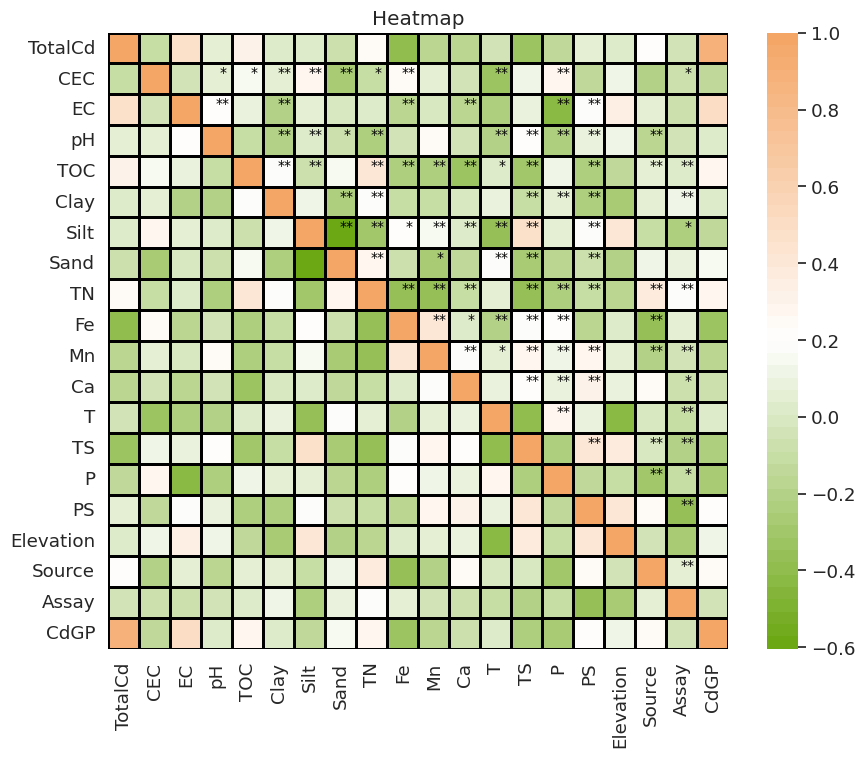

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import scipy.stats as stats

# 假设您的数据存储在名为df1的DataFrame中
# 假设已经定义了df1_log

# 计算相关性矩阵
correlation_matrix = df1_log.corr(method="pearson")

# 计算p值矩阵
p_matrix = np.zeros_like(correlation_matrix)
for i in range(len(df1_log.columns)):
    for j in range(len(df1_log.columns)):
        if i != j:
            corr, p_value = stats.spearmanr(df1_log.iloc[:, i], df1_log.iloc[:, j])
            p_matrix[i, j] = p_value

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 使用seaborn创建热力图
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

# 创建一个带边框的矩形对象
bbox_props = dict(boxstyle="square,pad=0.3", lw=1, edgecolor="black")

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=1, linecolor='black')

# 添加显著性标记到右上角
for i in range(len(df1_log.columns)):
    for j in range(i + 1, len(df1_log.columns)):
        p_value = p_matrix[i, j]
        if p_value < 0.01:
            plt.text(j + 0.7, i + 0.3, '**', ha='center', va='center', fontsize=10, color='black')
        elif p_value < 0.05:
            plt.text(j + 0.7, i + 0.3, '*', ha='center', va='center', fontsize=10, color='black')

plt.title("Heatmap")
plt.show()


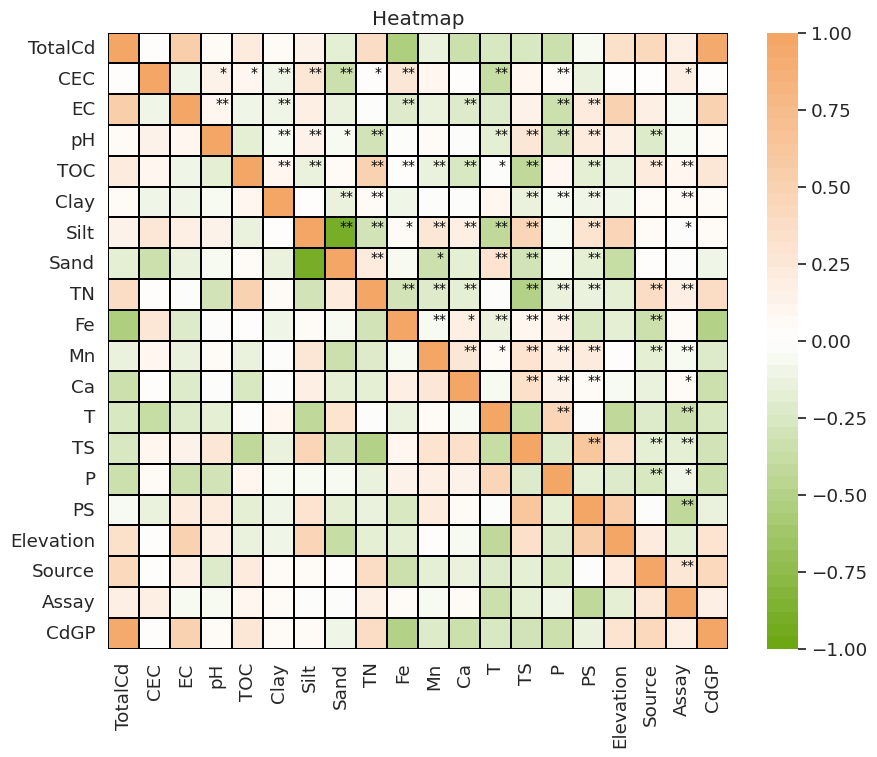

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import scipy.stats as stats

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵
correlation_matrix = df1.corr(method="pearson")

# 计算p值矩阵
p_matrix = np.empty_like(correlation_matrix)
p_matrix[:] = np.nan
for i in range(len(df1_log.columns)):
    for j in range(len(df1_log.columns)):
        if i != j:
            corr, p_value = stats.spearmanr(df1_log.iloc[:, i], df1_log.iloc[:, j])
            p_matrix[i, j] = p_value

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 使用 seaborn 创建热力图
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=0.1, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到右上角
for i in range(len(df1_log.columns)):
    for j in range(i + 1, len(df1_log.columns)):
        p_value = p_matrix[i, j]
        if p_value < 0.01:
            plt.text(j + 0.7, i + 0.3, '**', ha='center', va='center', fontsize=10, color='black')
        elif p_value < 0.05:
            plt.text(j + 0.7, i + 0.3, '*', ha='center', va='center', fontsize=10, color='black')

plt.title("Heatmap")

plt.show()


# 显著性标记

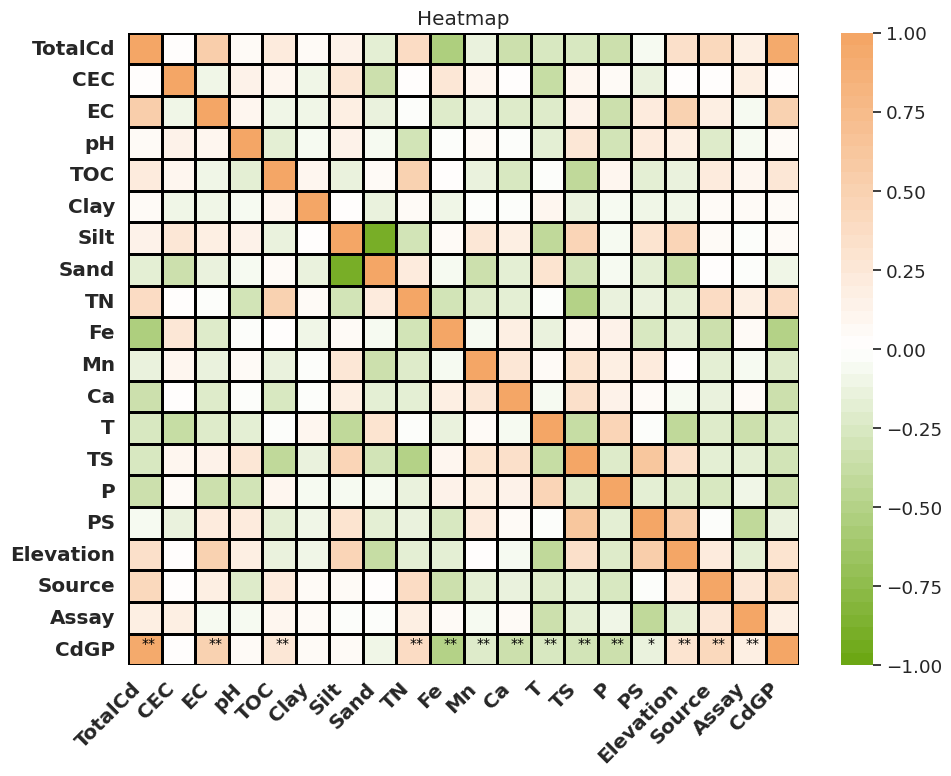

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和 p 值矩阵
correlation_matrix = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 创建热力图并添加黑色框
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=1, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到最后一行
for j in range(len(df1_log.columns)):
    p_value = p_matrix.iloc[-1, j]
    if p_value < 0.01:
        plt.text(j + 0.6, 19.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.6, 19.3, '*', ha='center', va='center', fontsize=10, color='black')

# 调整 x 轴标签的样式（加粗并倾斜45%）
fontprops = FontProperties(weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=fontprops)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontproperties=fontprops)
# 调整 x 轴位置
# ax.set_position([0.45, 0.15, 0.5, 0.7])

plt.title("Heatmap")
plt.tight_layout()
plt.savefig('df1.svg')
plt.show()


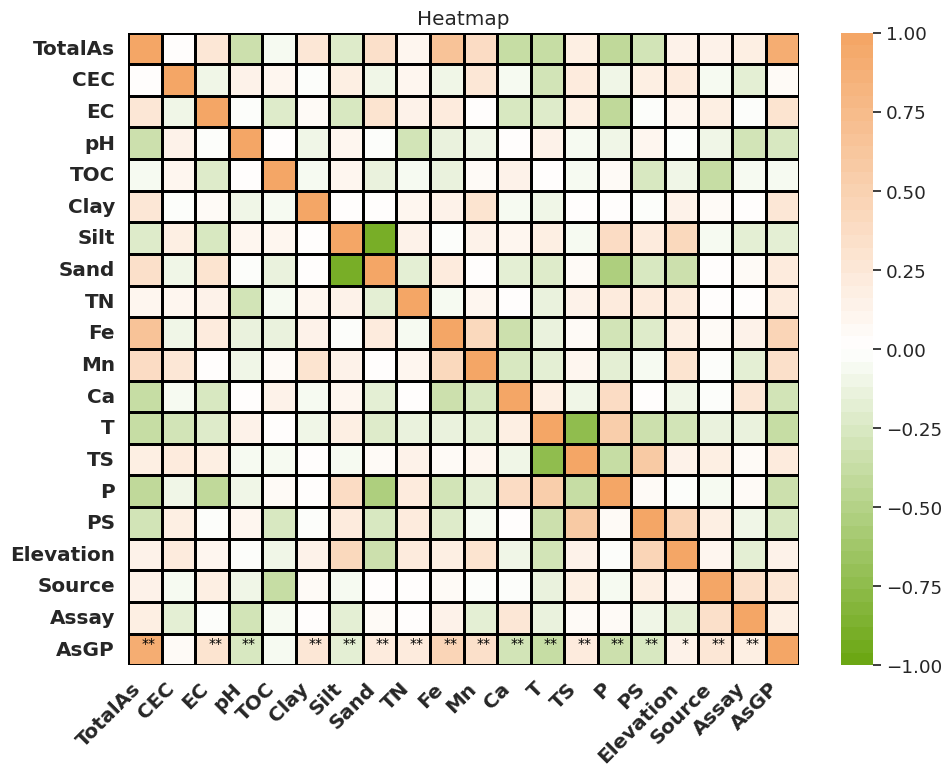

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和 p 值矩阵
correlation_matrix = df2.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df2.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 创建热力图并添加黑色框
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=1, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到最后一行
for j in range(len(df1_log.columns)):
    p_value = p_matrix.iloc[-1, j]
    if p_value < 0.01:
        plt.text(j + 0.6, 19.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.6, 19.3, '*', ha='center', va='center', fontsize=10, color='black')

# 调整 x 轴标签的样式（加粗并倾斜45%）
fontprops = FontProperties(weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=fontprops)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontproperties=fontprops)
# 调整 x 轴位置
# ax.set_position([0.45, 0.15, 0.5, 0.7])

plt.title("Heatmap")
plt.tight_layout()
plt.savefig('df2.svg')
plt.show()


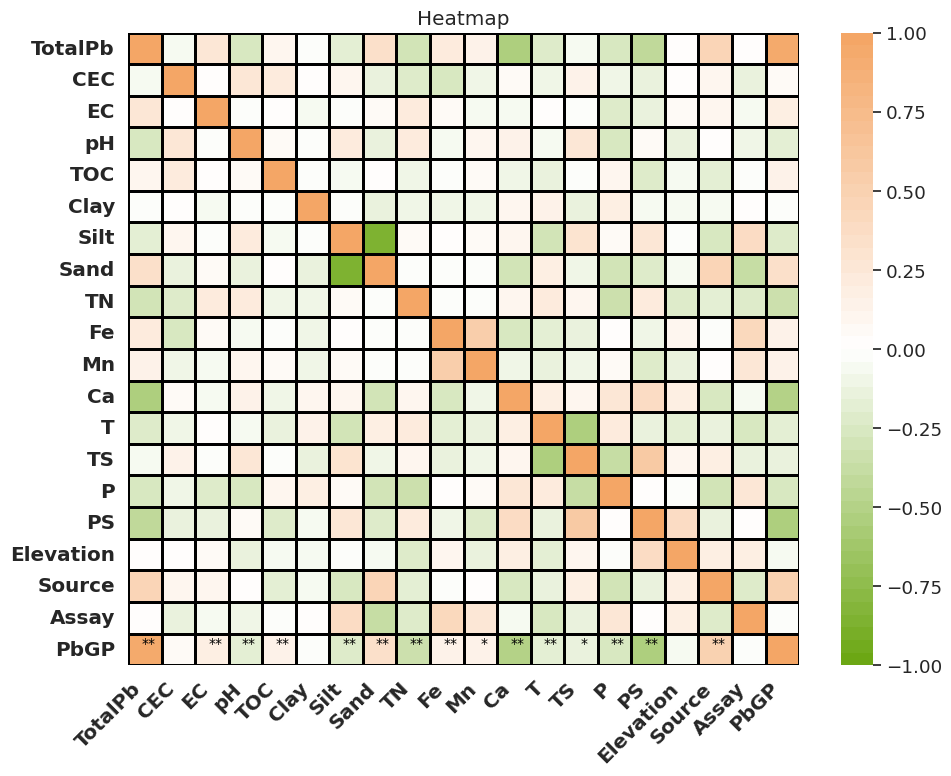

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和 p 值矩阵
correlation_matrix = df3.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df3.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 创建热力图并添加黑色框
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=1, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到最后一行
for j in range(len(df1_log.columns)):
    p_value = p_matrix.iloc[-1, j]
    if p_value < 0.01:
        plt.text(j + 0.6, 19.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.6, 19.3, '*', ha='center', va='center', fontsize=10, color='black')

# 调整 x 轴标签的样式（加粗并倾斜45%）
fontprops = FontProperties(weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=fontprops)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontproperties=fontprops)
# 调整 x 轴位置
# ax.set_position([0.45, 0.15, 0.5, 0.7])

plt.title("Heatmap")
plt.tight_layout()
plt.savefig('df3.svg')
plt.show()


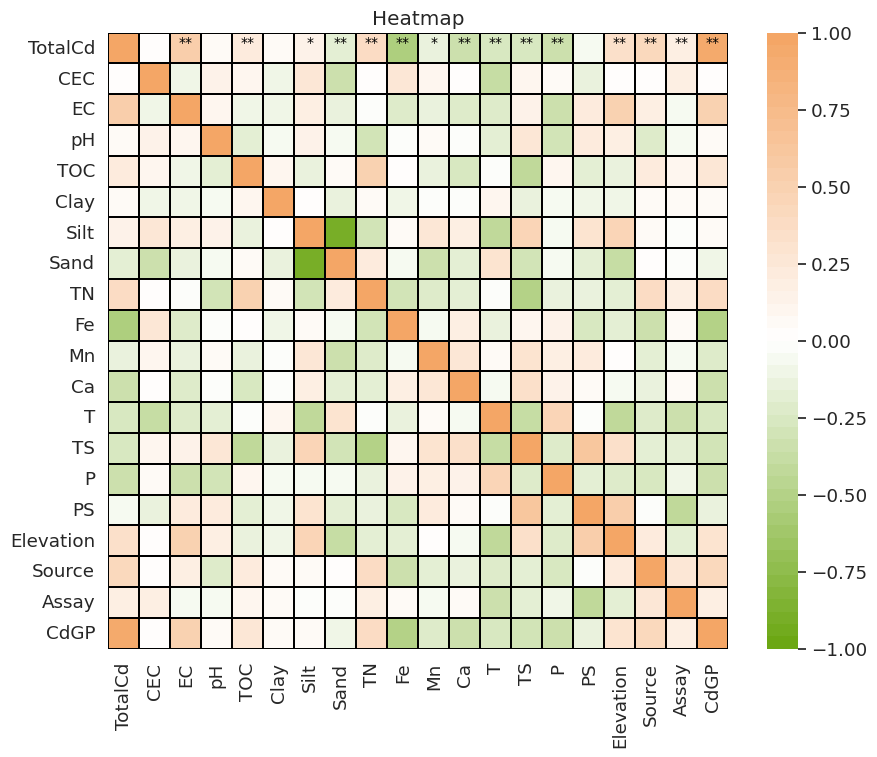

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和p值矩阵
correlation_matrix = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 添加第一行的显著性标记
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=0.006, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到右上角（只在第一行上添加）
for j in range(1, len(df1_log.columns)):
    p_value = p_matrix.iloc[0, j]
    if p_value < 0.01:
        plt.text(j + 0.5, 0.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.5, 0.3, '*', ha='center', va='center', fontsize=10, color='black')

plt.title("Heatmap")
plt.savefig('df1.svg')
plt.show()


In [50]:
df2_log=np.log(df2)

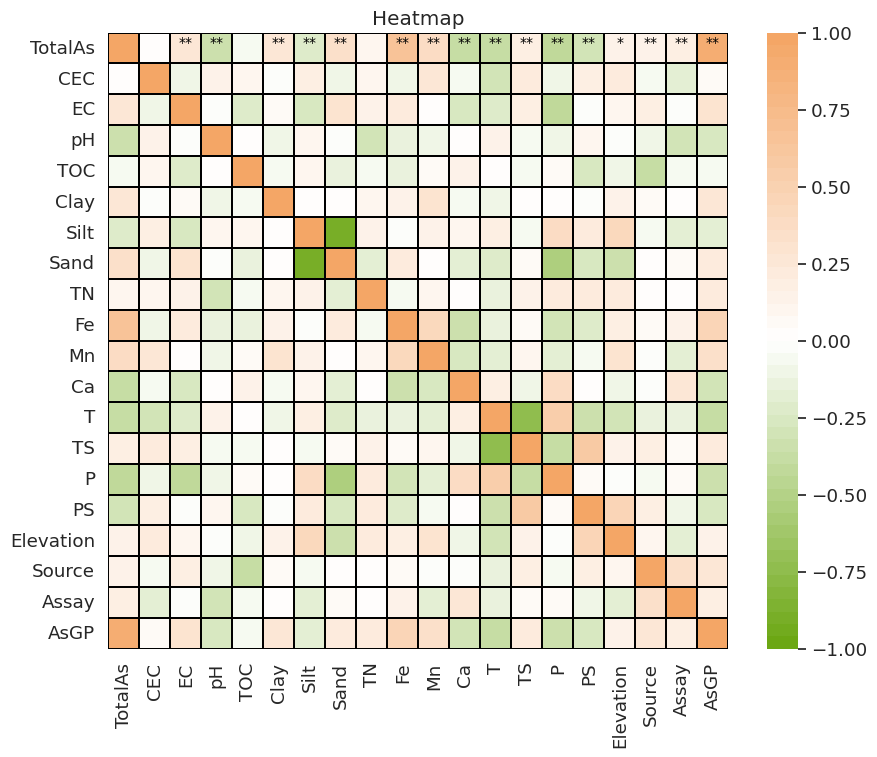

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和p值矩阵
correlation_matrix = df2.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df2.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 添加第一行的显著性标记
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=0.006, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到右上角（只在第一行上添加）
for j in range(1, len(df1_log.columns)):
    p_value = p_matrix.iloc[0, j]
    if p_value < 0.01:
        plt.text(j + 0.5, 0.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.5, 0.3, '*', ha='center', va='center', fontsize=10, color='black')

plt.title("Heatmap")
plt.savefig('df2.svg')
plt.show()


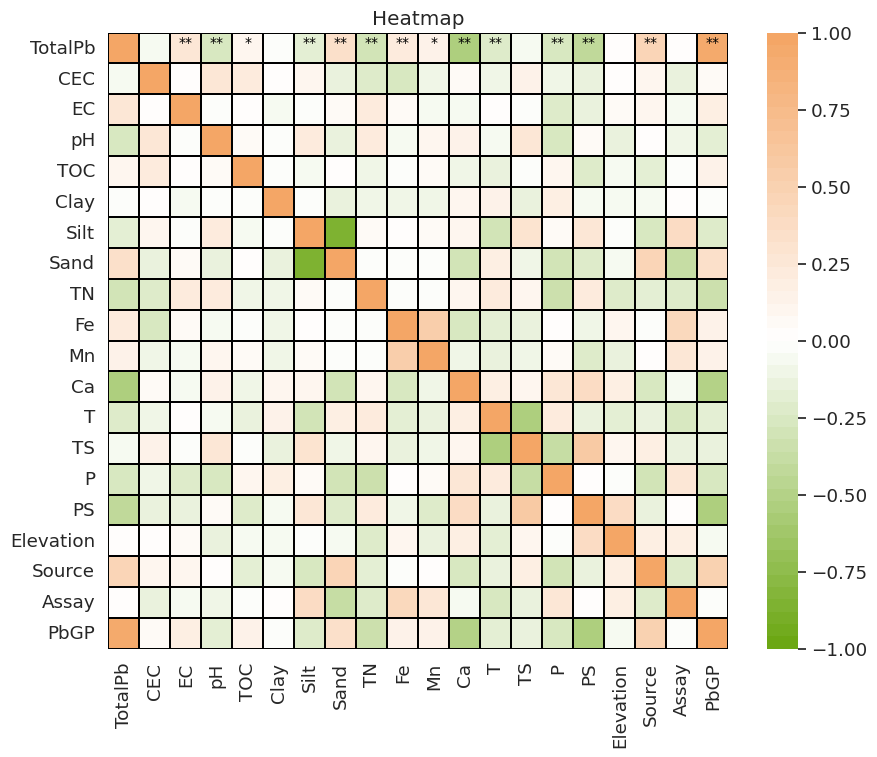

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 假设您的数据存储在名为 df1 的 DataFrame 中
# 假设已经定义了 df1_log

# 计算相关性矩阵和p值矩阵
correlation_matrix = df3.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
p_matrix = df3.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

# 添加第一行的显著性标记
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小

custom_colors = ['#6CA714', '#FFFFFF', '#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 创建热力图并添加黑色框
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar=True, linewidths=0.006, linecolor='black', vmin=-1, vmax=1)

# 添加显著性标记到右上角（只在第一行上添加）
for j in range(1, len(df1_log.columns)):
    p_value = p_matrix.iloc[0, j]
    if p_value < 0.01:
        plt.text(j + 0.5, 0.3, '**', ha='center', va='center', fontsize=10, color='black')
    elif p_value < 0.05:
        plt.text(j + 0.5, 0.3, '*', ha='center', va='center', fontsize=10, color='black')

plt.title("Heatmap")
plt.savefig('df3.svg')
plt.show()


In [3]:
df1_log = np.log(df1)

Text(0.5, 1.0, 'Heatmap')

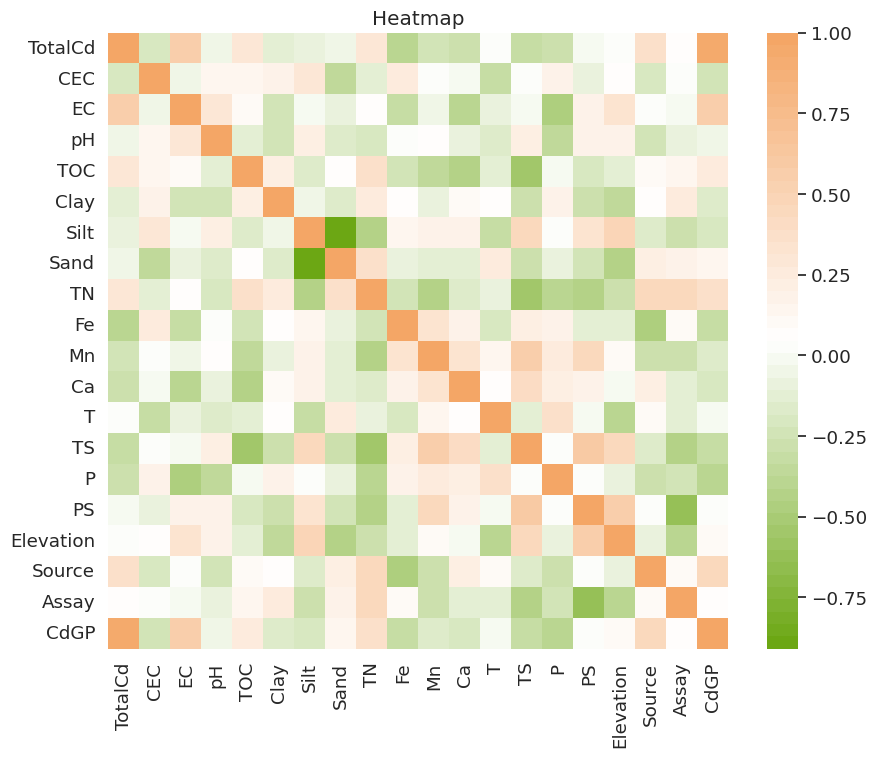

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df1_log.corr(method="spearman")

custom_colors = ['#6CA714','#FFFFFF','#F4A666']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 使用seaborn创建热力图
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小
sns.heatmap(correlation_matrix, cmap=cmap, annot=False)
plt.title("Heatmap")
# plt.show()
# plt.savefig("df1.svg", format="svg")

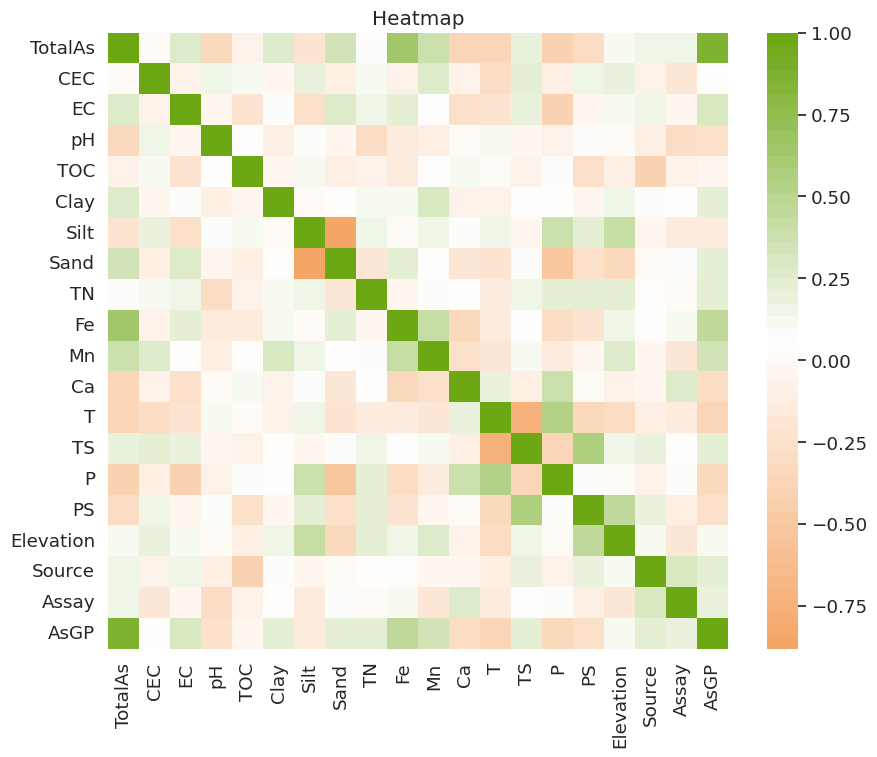

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df2.corr()

custom_colors = ['#F4A666','#FFFFFF','#6CA714']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 使用seaborn创建热力图
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小
sns.heatmap(correlation_matrix, cmap=cmap, annot=False)
plt.title("Heatmap")
# plt.show()
plt.savefig("df2.svg", format="svg")

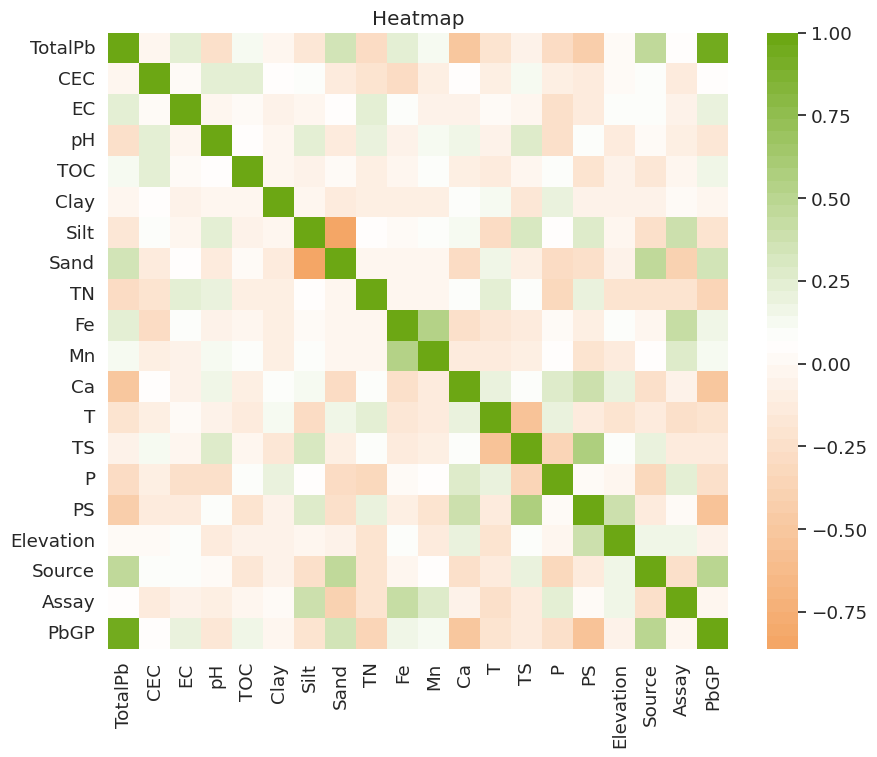

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df3.corr()

custom_colors = ['#F4A666','#FFFFFF','#6CA714']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 使用seaborn创建热力图
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 设置字体大小
sns.heatmap(correlation_matrix, cmap=cmap, annot=False)
plt.title("Heatmap")
# plt.show()
plt.savefig("df3.svg", format="svg")

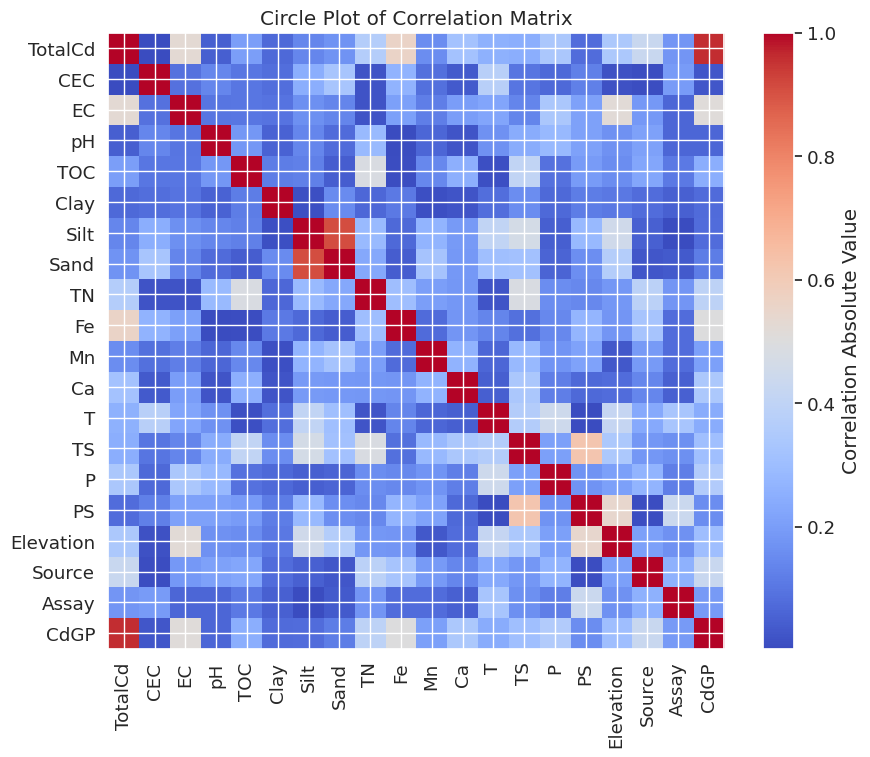

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df1.corr()

# 获取相关性的绝对值，并将其作为圆圈的大小
circle_sizes = np.abs(correlation_matrix.values)

# 使用imshow创建圆圈图
plt.figure(figsize=(10, 8))
plt.imshow(circle_sizes, cmap='coolwarm', origin='upper', interpolation='none')

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label("Correlation Absolute Value")

# 设置x和y轴的标签
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

plt.title("Circle Plot of Correlation Matrix")
plt.show()

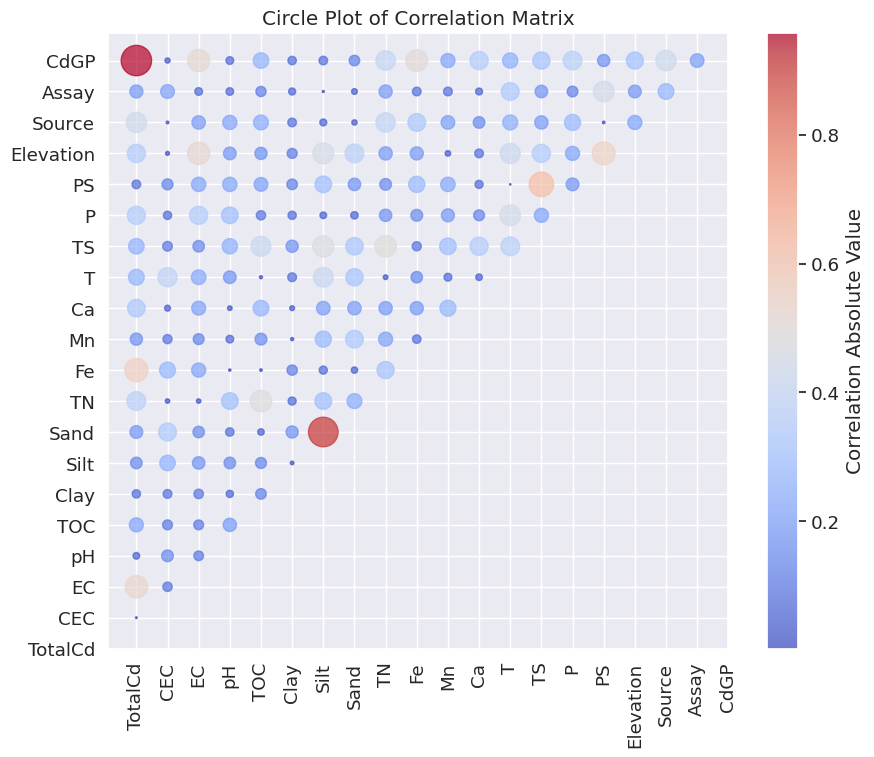

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df1.corr()

# 获取相关性的绝对值，并将其作为圆圈的大小
circle_sizes = np.abs(correlation_matrix.values)

# 创建相关性圆圈图
plt.figure(figsize=(10, 8))
plt.scatter(*np.where(np.triu(circle_sizes, k=1) > 0), s=circle_sizes[np.triu_indices_from(circle_sizes, k=1)] * 500, cmap='coolwarm', c=circle_sizes[np.triu_indices_from(circle_sizes, k=1)], alpha=0.7)

# 设置x和y轴的标签
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label("Correlation Absolute Value")

plt.title("Circle Plot of Correlation Matrix")
plt.show()


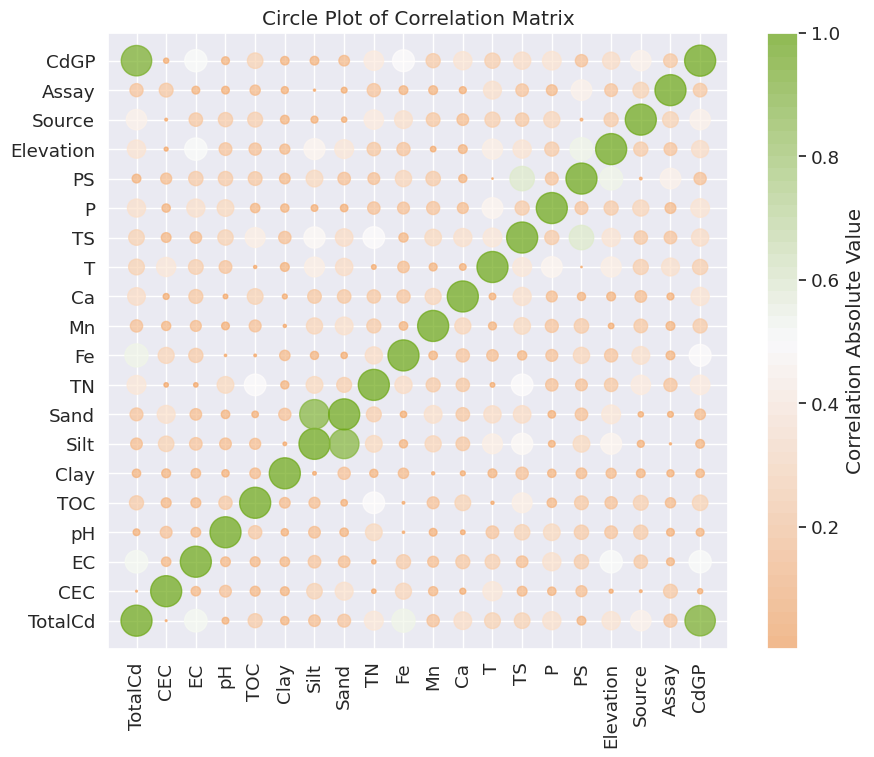

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设您的数据存储在名为df1的DataFrame中

# 计算相关性矩阵
correlation_matrix = df1.corr()

# 获取相关性的绝对值，并将其作为圆圈的大小
circle_sizes = np.abs(correlation_matrix.values)

# 创建相关性圆圈图
plt.figure(figsize=(10, 8))

# 获取相关性值的位置并将其添加到x和y坐标
x, y = np.where(circle_sizes > 0)


custom_colors = ['#F4A666','#FFFFFF','#6CA714']
n_bins = 50  # 调整这个值以控制颜色的分段数
cmap_name = "custom_cmap"

cmap = LinearSegmentedColormap.from_list(cmap_name, custom_colors, N=n_bins)

# 绘制圆圈，s参数控制圆圈的大小，c参数控制颜色
plt.scatter(x, y, s=circle_sizes[x, y] * 500, cmap=cmap, c=circle_sizes[x, y], alpha=0.7)

# 设置x和y轴的标签
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label("Correlation Absolute Value")

plt.title("Circle Plot of Correlation Matrix")
plt.show()


## 对完整数据集进行正则化应用于RR

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
x1_normalized = scaler.fit_transform(x1)
x2_normalized = scaler.fit_transform(x2)
x3_normalized = scaler.fit_transform(x3)

x1_normalized = pd.DataFrame(x1_normalized, columns=x1.columns)
x2_normalized = pd.DataFrame(x2_normalized, columns=x2.columns)
x3_normalized = pd.DataFrame(x3_normalized, columns=x3.columns)

## 导入缺失数据集应用于XGB CB

In [6]:
df1 = pd.read_csv('Cd.csv')
df2 = pd.read_csv('As.csv')
df3 = pd.read_csv('Pb.csv')

x11 = df1.iloc[:,:19]
y11 = df1.iloc[:,19]

x22 = df2.iloc[:,:19]
y22 = df2.iloc[:,19]

x33 = df3.iloc[:,:19]
y33 = df3.iloc[:,19]

# ANN

In [8]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error

cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_normalized, y1, test_size=0.2, random_state=i)

    # 定义基础模型
    ann_model = MLPRegressor()

    # 训练基础模型
    ann_model.fit(X1_train, y1_train)


    # 计算训练集的R方、RMSE
    r2_train = ann_model.score(X1_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, ann_model.predict(X1_train)))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(ann_model, X1_train, y1_train, cv=cv, scoring=['r2', 'neg_mean_squared_error'])

    cv_r2 = scores['test_r2']
    cv_rmse = -scores['test_neg_mean_squared_error']  # 注意这里取负值，因为评分函数返回的是负的MSE

    r2_test = ann_model.score(X1_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, ann_model.predict(X1_test)))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)
    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=[f'cv_r2_fold_{j+1}' for j in range(5)])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=[f'cv_rmse_fold_{j+1}' for j in range(5)])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2': [cv_r2.mean()],
        'cv_rmse': [cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('ann_metrics.csv', index=False)


/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarni

In [10]:
metrics_df.to_csv('ann_y1.csv', index=False)

In [11]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x2_normalized, y2, test_size=0.2, random_state=i)

    # 定义基础模型
    ann_model = MLPRegressor()

    # 训练基础模型
    ann_model.fit(X1_train, y1_train)


    # 计算训练集的R方、RMSE
    r2_train = ann_model.score(X1_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, ann_model.predict(X1_train)))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(ann_model, X1_train, y1_train, cv=cv, scoring=['r2', 'neg_mean_squared_error'])

    cv_r2 = scores['test_r2']
    cv_rmse = -scores['test_neg_mean_squared_error']  # 注意这里取负值，因为评分函数返回的是负的MSE

    r2_test = ann_model.score(X1_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, ann_model.predict(X1_test)))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)
    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=[f'cv_r2_fold_{j+1}' for j in range(5)])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=[f'cv_rmse_fold_{j+1}' for j in range(5)])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2': [cv_r2.mean()],
        'cv_rmse': [cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('ann_Y2.csv', index=False)

/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarni

In [12]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x3_normalized, y3, test_size=0.2, random_state=i)

    # 定义基础模型
    ann_model = MLPRegressor()

    # 训练基础模型
    ann_model.fit(X1_train, y1_train)


    # 计算训练集的R方、RMSE
    r2_train = ann_model.score(X1_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, ann_model.predict(X1_train)))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(ann_model, X1_train, y1_train, cv=cv, scoring=['r2', 'neg_mean_squared_error'])

    cv_r2 = scores['test_r2']
    cv_rmse = -scores['test_neg_mean_squared_error']  # 注意这里取负值，因为评分函数返回的是负的MSE

    r2_test = ann_model.score(X1_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, ann_model.predict(X1_test)))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)
    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=[f'cv_r2_fold_{j+1}' for j in range(5)])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=[f'cv_rmse_fold_{j+1}' for j in range(5)])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2': [cv_r2.mean()],
        'cv_rmse': [cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('ann_y3.csv', index=False)

/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/zwl/anaconda3/envs/ojj/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarni

## 模型集成

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import catboost as cb

In [8]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_normalized, y1, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x11, y1, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('boost_y11.csv')

KeyboardInterrupt: 

# x1_e

In [10]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_e, y1, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x1_e, y1, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x1_e, y1, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df1_e.csv')

In [11]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_g, y1, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x1_g, y1, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x1_g, y1, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df1_g.csv')

In [12]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x2_g, y2, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x2_g, y2, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x2_g, y2, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df2_g.csv')

In [13]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x2_e, y2, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x2_e, y2, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x2_e, y2, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df2_e.csv')

In [14]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x3_e, y3, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x3_g, y3, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x3_e, y3, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df3_e.csv')

In [15]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x3_g, y3, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x3_g, y3, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x3_g, y3, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('df3_g.csv')

# new_y1

In [9]:
cd_new = pd.read_csv('Cdnew.csv')
cd_new2 = pd.read_csv('Cdnew.csv')

x1_new = cd_new.iloc[:,:19]
x1_new2 = cd_new2.iloc[:,:19]

In [10]:
# 对新数据进行归一化处理，使用相同的归一化器
x1_normalized = scaler.fit_transform(x1)
x1_new_normalized = scaler.transform(x1_new)
x1_new_normalized = pd.DataFrame(x1_new_normalized, columns=x1.columns)

# 继续生成新的特征矩阵用于预测新数据
ridge_pred_new = ridge.predict(x1_new_normalized)
rf_pred_new = rf.predict(x1_new)
xgb_pred_new = xgb_model.predict(x1_new2)
cb_pred_new = cb_model.predict(x1_new2)

new_X_new = np.column_stack((ridge_pred_new, rf_pred_new, xgb_pred_new, cb_pred_new))

# 使用Boosting模型进行新数据的预测
y1_new_pred = boosting_model.predict(new_X_new)

# 将预测结果转换为 DataFrame
y1_new_pred_df = pd.DataFrame(y1_new_pred, columns=['y1_pred'])

y1_new_pred_df.to_csv('y1_new_pre_0706.csv')

# New_y2

In [27]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x2_normalized, y2, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x2, y2, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x22, y2, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('boost_y11.csv')

In [28]:
metrics_df

,r2_train,rmse_train,r2_test,rmse_test,random_state,cv_r2,cv_rmse,cv_r2_fold_1,cv_r2_fold_2,cv_r2_fold_3,cv_r2_fold_4,cv_r2_fold_5,cv_rmse_fold_1,cv_rmse_fold_2,cv_rmse_fold_3,cv_rmse_fold_4,cv_rmse_fold_5
0,0.963961,0.216825,0.865742,0.396876,0,0.948455,0.255364,0.952322,0.964161,0.936668,0.953837,0.935289,0.262146,0.184710,0.299973,0.274044,0.255948
1,0.960726,0.224705,0.872213,0.403613,1,0.943218,0.269433,0.948855,0.942548,0.945784,0.941317,0.937585,0.257169,0.266530,0.259057,0.274231,0.290180
2,0.960783,0.222223,0.836810,0.473872,2,0.944221,0.260947,0.950833,0.932531,0.926493,0.942333,0.968914,0.245497,0.283613,0.320482,0.257189,0.197953
3,0.959629,0.229848,0.907332,0.331808,3,0.940538,0.277249,0.933118,0.928416,0.944594,0.944016,0.952548,0.277671,0.325486,0.277146,0.265151,0.240790
4,0.960859,0.223753,0.892351,0.374235,4,0.942748,0.262832,0.949447,0.927224,0.937309,0.964360,0.935399,0.258280,0.298199,0.282273,0.227152,0.248255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.963766,0.212666,0.867491,0.431513,95,0.950936,0.241971,0.943244,0.966436,0.935435,0.963211,0.946353,0.271853,0.201755,0.269415,0.221206,0.245628
96,0.960464,0.224589,0.870988,0.412282,96,0.941658,0.270202,0.942835,0.950205,0.956233,0.920560,0.938457,0.255770,0.275572,0.230551,0.318891,0.270228
97,0.963479,0.218495,0.840064,0.434510,97,0.950001,0.253100,0.960694,0.951741,0.941877,0.952617,0.943076,0.222301,0.254269,0.256237,0.258358,0.274337
98,0.960549,0.223128,0.884481,0.397043,98,0.943470,0.264776,0.958159,0.941883,0.938338,0.928347,0.950623,0.214820,0.290451,0.278296,0.288939,0.251373


In [29]:
max(metrics_df.r2_test)

0.9241853692869252

In [15]:
as_new = pd.read_csv('Asnew.csv')
as_new2 = pd.read_csv('Asnew.csv')

x2_new = as_new.iloc[:,:19]
x2_new2 = as_new2.iloc[:,:19]

In [30]:
# 对新数据进行归一化处理，使用相同的归一化器
x2_normalized = scaler.fit_transform(x2)
x2_new_normalized = scaler.transform(x2_new)
x2_new_normalized = pd.DataFrame(x2_new_normalized, columns=x2.columns)

# 继续生成新的特征矩阵用于预测新数据
ridge_pred_new = ridge.predict(x2_new_normalized)
rf_pred_new = rf.predict(x2_new)
xgb_pred_new = xgb_model.predict(x2_new2)
cb_pred_new = cb_model.predict(x2_new2)

new_X_new = np.column_stack((ridge_pred_new, rf_pred_new, xgb_pred_new, cb_pred_new))

# 使用Boosting模型进行新数据的预测
y2_new_pred = boosting_model.predict(new_X_new)

# 将预测结果转换为 DataFrame
y2_new_pred_df = pd.DataFrame(y2_new_pred, columns=['y2_pred'])

y2_new_pred_df.to_csv('y2_new_pre_0706.csv')

# y3_new

In [17]:
pb_new = pd.read_csv('Pbnew.csv')
pb_new2 = pd.read_csv('Pbnew.csv')

# 将'#NUM!'替换为NaN值
pb_new = pb_new.replace('#NUM!', np.nan)
pb_new2 = pb_new2.replace('#NUM!', np.nan)
# 将数据格式转换为float
pb_new = pb_new.astype(float)
pb_new2 = pb_new2.astype(float)

x3_new = pb_new.iloc[:,:19]
x3_new2 = pb_new2.iloc[:,:19]

In [18]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x3_normalized, y3, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x3, y3, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x33, y3, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))


    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_train, y1_train)
    rmse_train = np.sqrt(mean_squared_error(y1_train, boosting_model.predict(new_X_train)))


    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_train, y1_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])


    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y1_test)
    rmse_test = np.sqrt(mean_squared_error(y1_test, boosting_model.predict(new_X_test)))


    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('boost_y11.csv')

In [19]:
metrics_df

,r2_train,rmse_train,r2_test,rmse_test,random_state,cv_r2,cv_rmse,cv_r2_fold_1,cv_r2_fold_2,cv_r2_fold_3,cv_r2_fold_4,cv_r2_fold_5,cv_rmse_fold_1,cv_rmse_fold_2,cv_rmse_fold_3,cv_rmse_fold_4,cv_rmse_fold_5
0,0.965883,0.221487,0.910166,0.289787,0,0.942393,0.282727,0.963412,0.938571,0.925865,0.924851,0.959265,0.196478,0.281567,0.418363,0.282664,0.234562
1,0.965702,0.206187,0.921127,0.362912,1,0.940959,0.262944,0.959981,0.969153,0.917501,0.929556,0.928604,0.246634,0.193740,0.325604,0.279816,0.268926
2,0.966946,0.209843,0.901604,0.361437,2,0.955617,0.241090,0.946545,0.947641,0.972145,0.954965,0.956789,0.241948,0.265541,0.183866,0.270319,0.243775
3,0.966678,0.217138,0.879660,0.352032,3,0.948072,0.257959,0.952467,0.916998,0.964845,0.975021,0.931032,0.274195,0.308581,0.207227,0.205245,0.294545
4,0.964592,0.221148,0.942934,0.258284,4,0.947185,0.263465,0.932251,0.961155,0.949846,0.961737,0.930935,0.348023,0.225742,0.243702,0.258700,0.241159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965994,0.214649,0.890897,0.358467,95,0.949003,0.259093,0.950762,0.949572,0.945800,0.933367,0.965513,0.252096,0.246689,0.240734,0.331695,0.224252
96,0.965579,0.213774,0.916853,0.337403,96,0.934195,0.285704,0.937904,0.939090,0.957288,0.964751,0.871943,0.257183,0.252443,0.235046,0.197937,0.485910
97,0.967397,0.204466,0.864477,0.455430,97,0.948833,0.249312,0.932346,0.967330,0.972403,0.943757,0.928331,0.263337,0.209163,0.190644,0.272087,0.311329
98,0.970380,0.203185,0.793222,0.478492,98,0.948380,0.260977,0.934812,0.968688,0.964300,0.917077,0.957024,0.276244,0.196667,0.217751,0.404510,0.209715


In [21]:
x3_new = x3_new.fillna(0)
x3_new2 = x3_new2.fillna(0)

In [22]:
# 对新数据进行归一化处理，使用相同的归一化器
x3_normalized = scaler.fit_transform(x3)
x3_new_normalized = scaler.transform(x3_new)
x3_new_normalized = pd.DataFrame(x3_new_normalized, columns=x3.columns)

# 继续生成新的特征矩阵用于预测新数据
ridge_pred_new = ridge.predict(x3_new_normalized)
rf_pred_new = rf.predict(x3_new)
xgb_pred_new = xgb_model.predict(x3_new2)
cb_pred_new = cb_model.predict(x3_new2)

new_X_new = np.column_stack((ridge_pred_new, rf_pred_new, xgb_pred_new, cb_pred_new))

# 使用Boosting模型进行新数据的预测
y3_new_pred = boosting_model.predict(new_X_new)

# 将预测结果转换为 DataFrame
# y3_new_pred_original = np.exp(y3_new_pred)
y3_new_pred_df = pd.DataFrame(y3_new_pred, columns=['y3_pred'])


# # x3_new 的第一列为除数
# divisor = x3_new.iloc[:, 0].values

# # 对 y3_new_pred 中的每个元素除以 divisor
# y3_new_pred_divided = y3_new_pred / divisor

y3_new_pred_df.to_csv('y3_new_pre_final_0706.csv')

In [51]:
from sklearn.impute import KNNImputer

# 假设 x3_new 是你的新数据
knn_imputer = KNNImputer(n_neighbors=5)  # 创建 KNNImputer 对象，设置邻居数为5

# 对新数据进行缺失值填补
x3_new_filled = knn_imputer.fit_transform(x3_new)

# 将填补后的数据转换为 DataFrame
x3_new_filled = pd.DataFrame(x3_new_filled, columns=x3.columns)

# 对新数据进行归一化处理，使用相同的归一化器
x3_normalized = scaler.fit_transform(x3)
x3_new_normalized = scaler.transform(x3_new_filled)
x3_new_normalized = pd.DataFrame(x3_new_normalized, columns=x3.columns)

# 继续生成新的特征矩阵用于预测新数据
ridge_pred_new = ridge.predict(x3_new_normalized)
rf_pred_new = rf.predict(x3_new_filled)
xgb_pred_new = xgb_model.predict(x3_new)
cb_pred_new = cb_model.predict(x3_new)

new_X_new = np.column_stack((ridge_pred_new, rf_pred_new, xgb_pred_new, cb_pred_new))

# 使用Boosting模型进行新数据的预测
y3_new_pred = boosting_model.predict(new_X_new)

# 将预测结果转换为 DataFrame
y3_new_pred_original = np.exp(y3_new_pred)
y3_new_pred_df = pd.DataFrame(y3_new_pred_original, columns=['y3_pred'])


# x3_new 的第一列为除数
divisor = x3_new.iloc[:, 0].values

# 对 y3_new_pred 中的每个元素除以 divisor
y3_new_pred_divided = y3_new_pred / divisor

y3_new_pred_df.to_csv('y3_pre.csv')

In [41]:
y3_new_df = pd.DataFrame(y3_new_pred, columns=['y3_pred'])
y3_new_df.to_csv('y3_new.csv')

## 集成模型中各模型贡献率分析

Ridge: 0.0004816476563314191
Random Forest: 0.16457660824164852
XGBoost: 0.5488965816925043
CatBoost: 0.28604516240951566


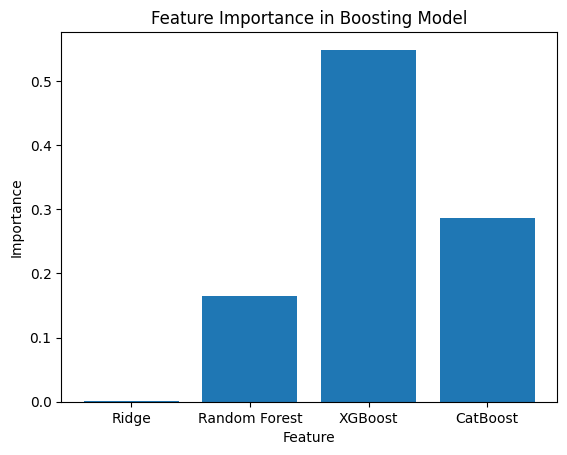

In [ ]:
feature_importances_sum = np.zeros(4) # 初始化特征重要性总和
feature_names = ["Ridge", "Random Forest", "XGBoost", "CatBoost"]

for i in range(100):
     # 数据集准备和基础模型训练，跟之前的代码一样
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_normalized, y1, test_size=0.2, random_state=i)
    X11train, X11test, y11train, y11test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    X111rain, X111est, y111rain, y111est = train_test_split(x11,y1, test_size=0.2, random_state=i)

    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10, bootstrap=True, n_estimators=100, max_depth=10, max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False, l2_leaf_reg=5, iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11train, y11train)
    xgb_model.fit(X111rain, y111rain)
    cb_model.fit(X111rain, y111rain)

    # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11train)
    xgb_pred_train = xgb_model.predict(X111rain)
    cb_pred_train = cb_model.predict(X111rain)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))

    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)

    # 计算特征重要性
    feature_importances_sum += boosting_model.feature_importances_

# 求平均特征重要性
feature_importances_avg = feature_importances_sum / 100

# 打印特征重要性
for i, importance in enumerate(feature_importances_avg):
    print(f"{feature_names[i]}: {importance}")

# 绘制特征重要性柱状图
plt.bar(feature_names, feature_importances_avg)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Boosting Model")
plt.show()

Ridge: 0.0004816476563314191
Random Forest: 0.16457660824164852
XGBoost: 0.5488965816925043
CatBoost: 0.28604516240951566


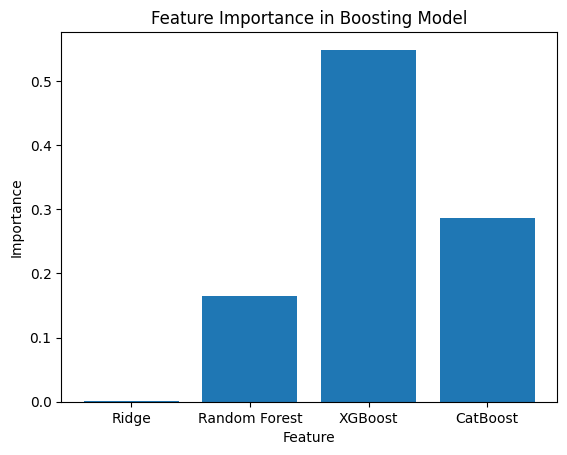

In [ ]:
# 打印特征重要性
for i, importance in enumerate(feature_importances_avg):
    print(f"{feature_names[i]}: {importance}")

# 绘制特征重要性柱状图
plt.bar(feature_names, feature_importances_avg)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Boosting Model")
plt.show()

## 输入特征重要性分析

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

<ipython-input-13-e60dfcfbb64f>:110: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontweight('bold')
<ipython-input-13-e60dfcfbb64f>:111: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(23)
<ipython-input-13-e60dfcfbb64f>:113: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontweight('bold')
<ipython-input-13-e60dfcfbb64f>:114: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(23)


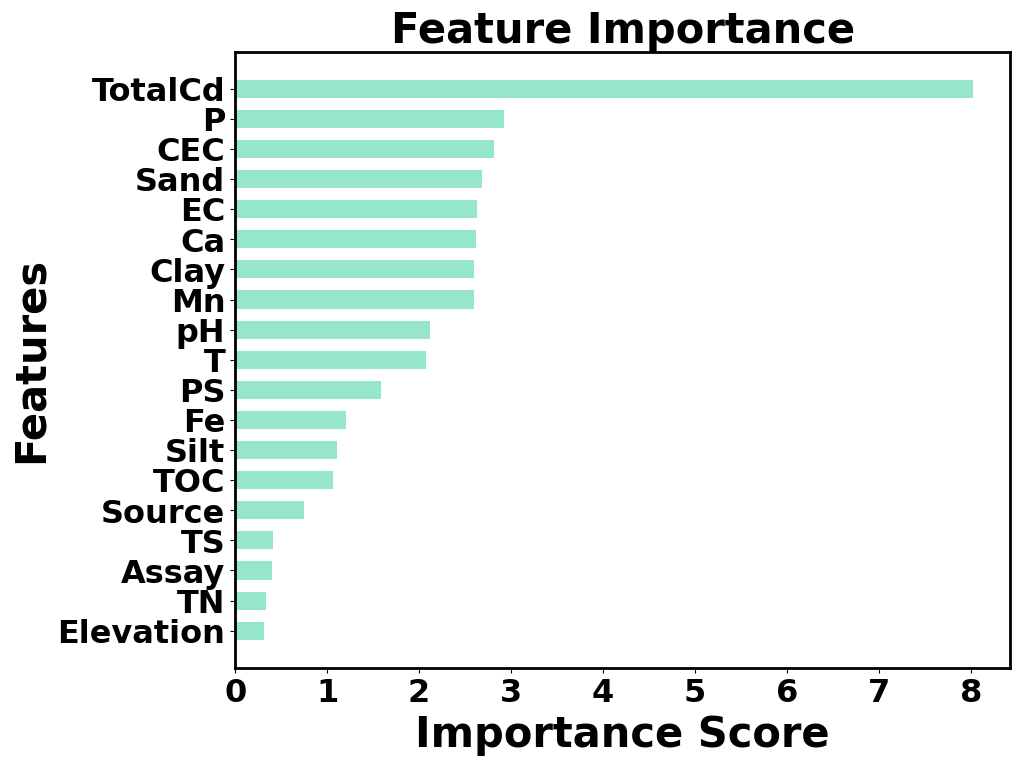

In [ ]:
# 输入特征变量
input_feature_names = ["TotalCd", "CEC", "EC", "pH", "TOC","Clay", "Silt", "Sand", "TN", "Fe","Mn", "Ca", "T", "TS", "P", "PS", 
                       "Elevation", "Source", "Assay"]
n_features = len(input_feature_names)

# 初始化特征重要性总和
feature_importances_sum = np.zeros(n_features)
rf_weight_importance_sum = np.zeros(n_features)  # 初始化随机森林权重特征重要性累加和
cb_weight_importance_sum = np.zeros(n_features)  # 初始化CatBoost权重特征重要性累加和
xgb_weight_importance_sum = np.zeros(n_features)  # 初始化XGBoost权重特征重要性累加和

for i in range(10):

    # 数据集准备和基础模型训练，跟之前的代码一样
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_normalized, y1, test_size=0.2, random_state=i)
    X11train, X11test, y11train, y11test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    X111rain, X111est, y111rain, y111est = train_test_split(x11,y1, test_size=0.2, random_state=i)

    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10, bootstrap=True, n_estimators=100, max_depth=10, max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False, l2_leaf_reg=5, iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11train, y11train)
    xgb_model.fit(X111rain, y111rain)
    cb_model.fit(X111rain, y111rain)

    # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11train)
    xgb_pred_train = xgb_model.predict(X111rain)
    cb_pred_train = cb_model.predict(X111rain)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))

    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)

    # Ridge 特征重要性
    ridge_importance = np.abs(ridge.coef_)

    # 随机森林权重特征重要性
    rf_weight_importance = rf.feature_importances_
    rf_weight_importance_sum += rf_weight_importance  # 累加随机森林权重特征重要性

    # XGBoost 权重特征重要性
    booster = xgb_model.get_booster()
    importance = booster.get_score(importance_type='weight')
    importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    feature_names, scores = zip(*importance)
    xgb_weight_importance = np.zeros(n_features)
    for feature, score in zip(feature_names, scores):
        feature_index = input_feature_names.index(feature)
        xgb_weight_importance[feature_index] = score
    xgb_weight_importance_sum += xgb_weight_importance  # 累加XGBoost权重特征重要性

    
    # CatBoost 权重特征重要性
    cb_weight_importance = cb_model.get_feature_importance(
        data=cb.Pool(X111rain, y111rain),
        type='LossFunctionChange',
        thread_count=-1,
        verbose=False
    )
    cb_weight_importance_sum += cb_weight_importance  # 累加CatBoost权重特征重要性
    # ...

    # 计算模型贡献率
    model_contributions = boosting_model.feature_importances_
    
    # 求平均特征重要性
    rf_weight_importance_avg = rf_weight_importance_sum / 10  # 求平均随机森林权重特征重要性
    cb_weight_importance_avg = cb_weight_importance_sum / 10  # 求平均CatBoost权重特征重要性
    xgb_weight_importance_avg = xgb_weight_importance_sum / 10  # 求平均XGBoost权重特征重要性
    feature_importances_avg = feature_importances_sum / 10
    
   # 使用模型贡献率对基础模型的平均权重特征重要性进行加权
    weighted_importance = (
    ridge_importance * model_contributions[0]
    + rf_weight_importance_avg * model_contributions[1]
    + xgb_weight_importance_avg * model_contributions[2]  # 使用平均XGBoost权重特征重要性
    + cb_weight_importance_avg * model_contributions[3]  # 使用平均CatBoost权重特征重要性
    )

    # 累加特征重要性
    feature_importances_sum += weighted_importance

# 对特征重要性进行排序
sorted_indices = np.argsort(feature_importances_avg)[::-1]
sorted_importances = feature_importances_avg[sorted_indices]
sorted_feature_names = np.array(input_feature_names)[sorted_indices]

# 设置字体为Arial并加粗
rcParams['font.family'] = 'Arial'
rcParams['font.weight'] = 'bold'

# 绘制特征重要性柱状图
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(sorted_feature_names, sorted_importances, color='#95E6CC', height=0.6)
plt.ylabel('Features', fontsize=30, fontweight='bold')
plt.xlabel('Importance Score', fontsize=30, fontweight='bold')
plt.title('Feature Importance', fontsize=30, fontweight='bold')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
    tick.label.set_fontsize(23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
    tick.label.set_fontsize(23)  
# 设置边框加粗
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.gca().invert_yaxis()  # 反转y轴，使得特征重要性从上到下降低
#plt.savefig('feature_importance_Cd_horizontal.svg', format='svg')
plt.show()

## PDP图的绘制 还没改好，画不出来。。。。

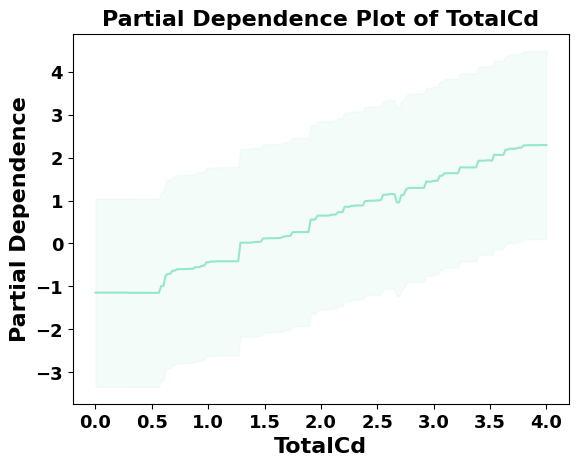

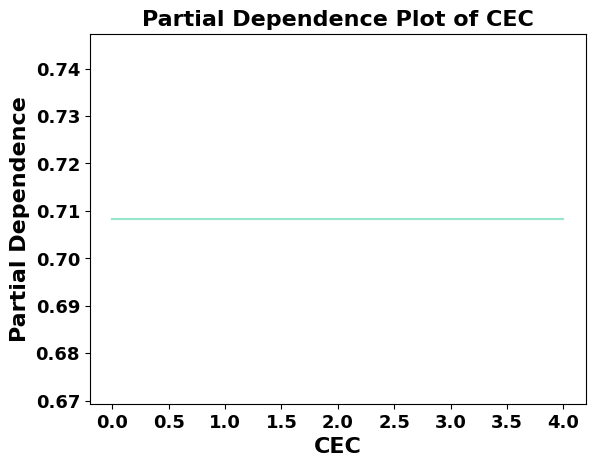

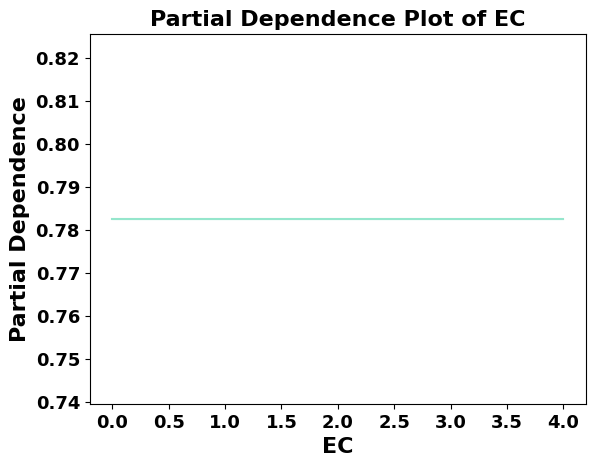

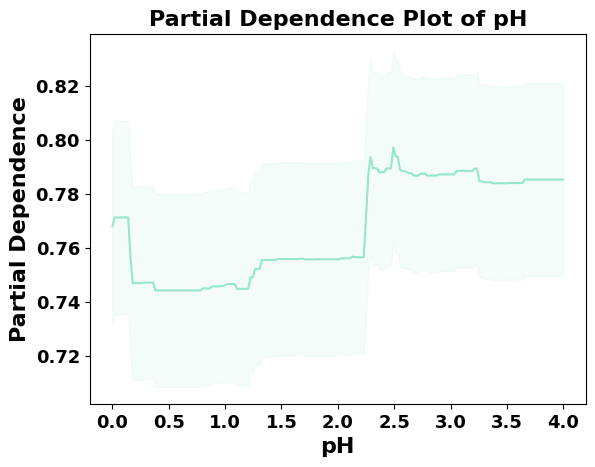

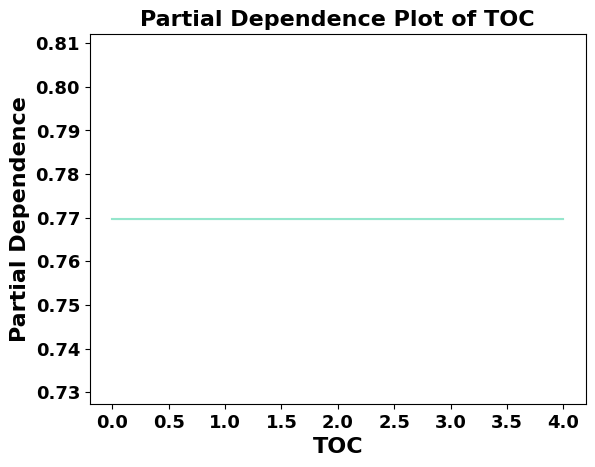

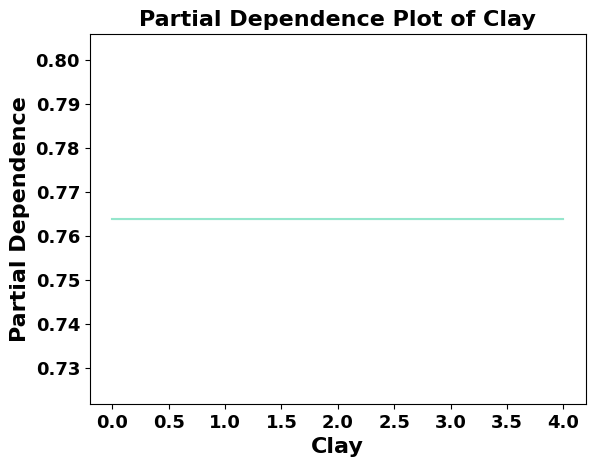

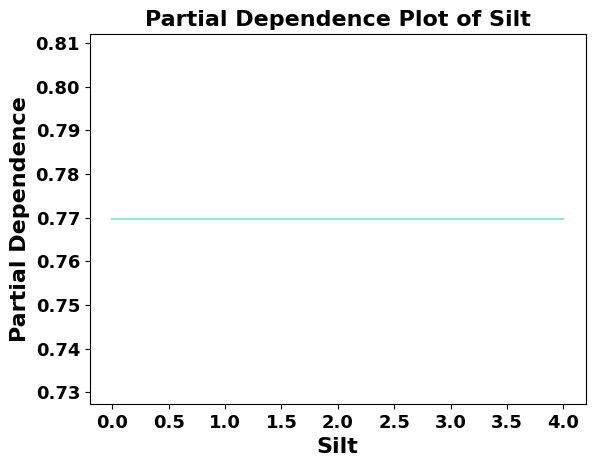

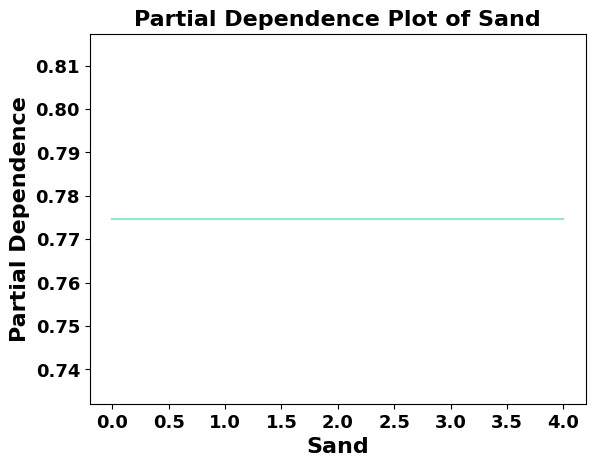

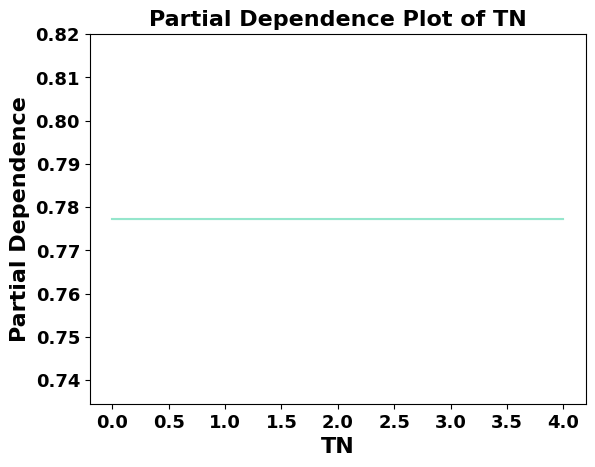

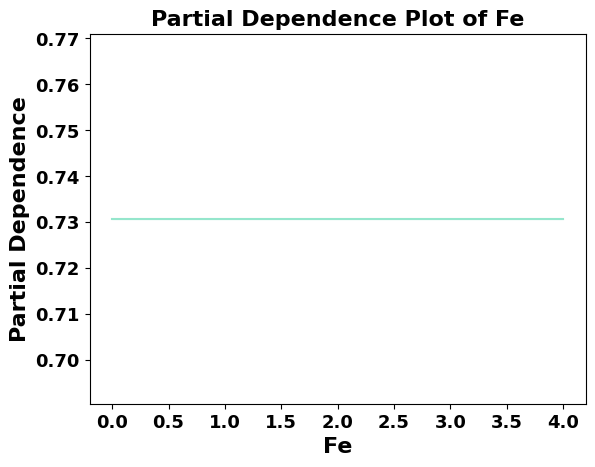

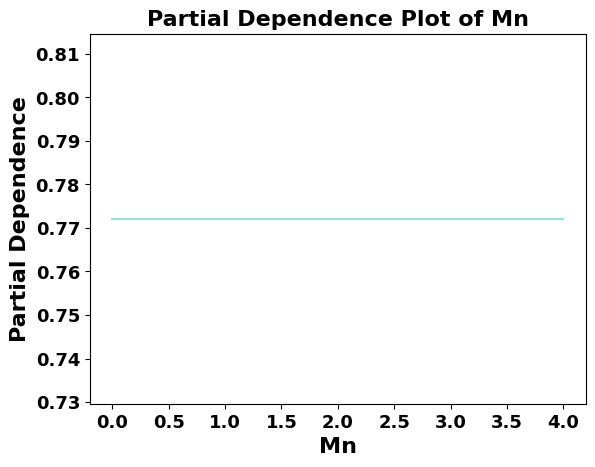

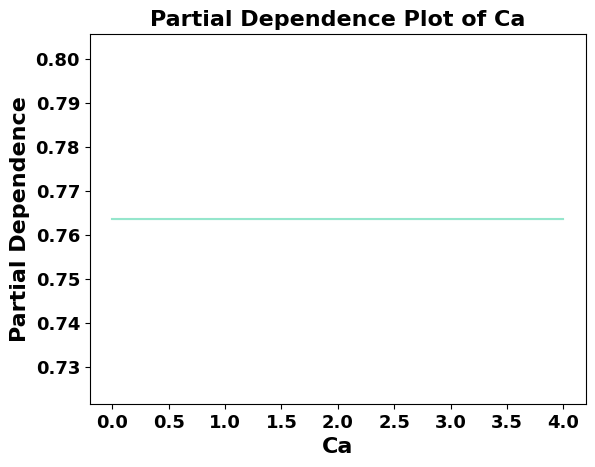

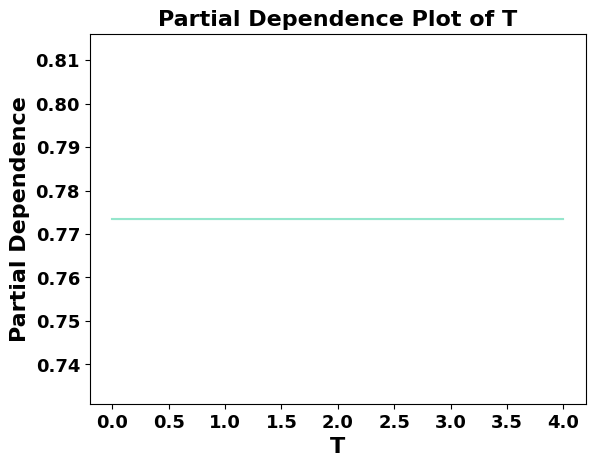

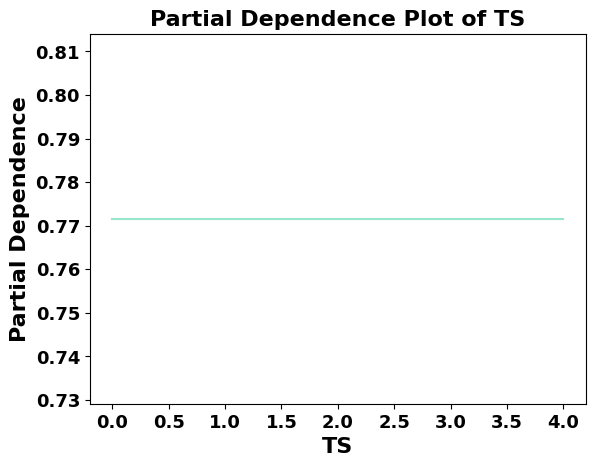

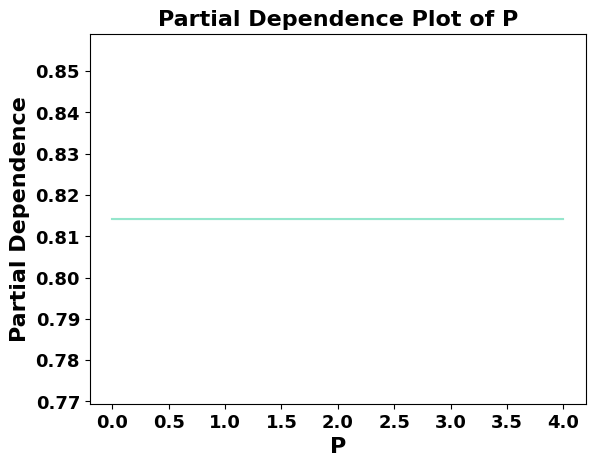

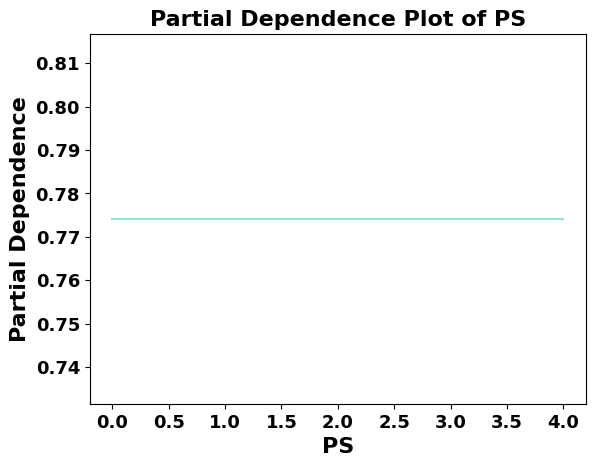

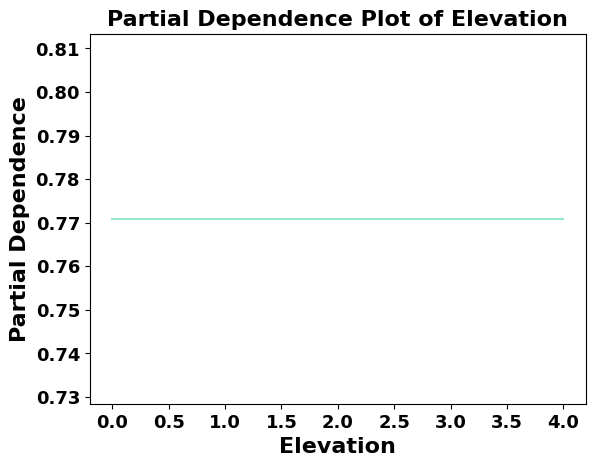

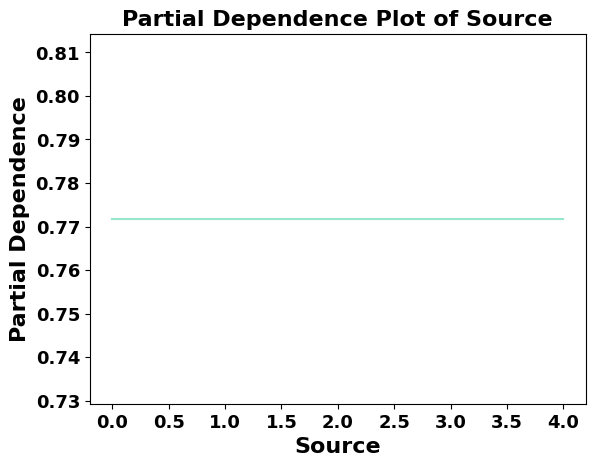

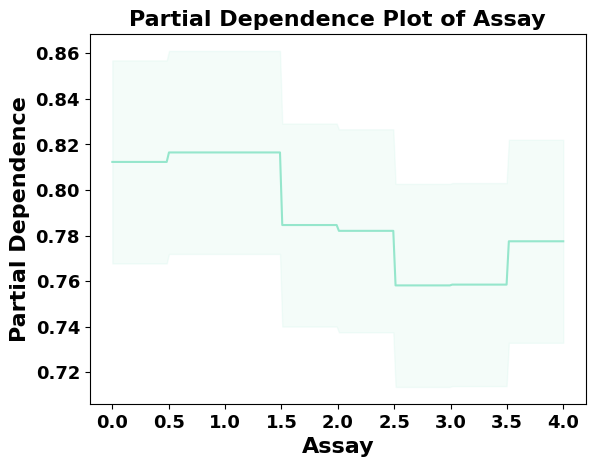

In [ ]:
# 提取特征名称（列名）并将其转换为 NumPy 数组
feature_names = np.array(df1.columns[:-1])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, :-1], df1.iloc[:, -1], test_size=0.2, random_state=75)

# 初始化加权平均 PDP 值
weighted_avg_pdp = np.zeros((len(feature_names), 200))

# 计算不同 random_state 下的 PDP 值
for random_state in range(100):
    # 训练XGBoost回归模型
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    # 创建部分依赖图
    for i, feature in enumerate(feature_names):
        # 为选定的特征创建一个网格
        selected_feature_index = i
        X_np = X_test.values
        min_value = X_np[:, selected_feature_index].min()
        max_value = X_np[:, selected_feature_index].max()
        grid_values = np.linspace(min_value, max_value, 200)

        # 计算部分依赖值
        partial_dependence_values = []
        for grid_value in grid_values:
            X_temp = X_np.copy()
            X_temp[:, selected_feature_index] = grid_value
            preds = model.predict(X_temp)
            pd_value = preds.mean()
            partial_dependence_values.append(pd_value)

        # 计算加权平均 PDP 值
        weighted_avg_pdp[i] += np.array(partial_dependence_values) / 100

# 绘制加权平均 PDP 图
for i, feature in enumerate(feature_names):
    selected_feature = feature
    plt.plot(grid_values, weighted_avg_pdp[i], color="#95E6CC")
    plt.fill_between(grid_values, weighted_avg_pdp[i] - 1.96 * np.std(weighted_avg_pdp[i]),
                     weighted_avg_pdp[i] + 1.96 * np.std(weighted_avg_pdp[i]),
                     alpha=0.1, color="#95E6CC")
    plt.xlabel(selected_feature, size=16, fontweight='bold')
    plt.ylabel('Partial Dependence', size=16, fontweight='bold')
    plt.title(f'Partial Dependence Plot of {selected_feature}', size=16, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=13, fontweight='bold')  # 设置x坐标字体和大小
    plt.yticks(fontproperties='Arial', size=13, fontweight='bold')  # 设置y坐标字体和大小
    plt.show()

In [ ]:
for i in range(100):
    # 数据集准备
    X1_train, X1_test, y1_train, y1_test = train_test_split(x1_normalized, y1, test_size=0.2, random_state=i)
    X11_train, X11_test, y11_train, y11_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    X111_train, X111_test, y111_train, y111_test = train_test_split(x11, y1, test_size=0.2, random_state=i)
    # 定义基础模型
    ridge = Ridge(alpha=5.0)
    rf = RandomForestRegressor(min_samples_split=10,bootstrap=True,n_estimators=100,max_depth=10,max_features='sqrt')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
    cb_model = cb.CatBoostRegressor(verbose=False,l2_leaf_reg=5,iterations=300)

    # 训练基础模型
    ridge.fit(X1_train, y1_train)
    rf.fit(X11_train, y11_train)
    xgb_model.fit(X111_train, y111_train)
    cb_model.fit(X111_train, y111_train)

   # 生成新的特征矩阵用于预测
    ridge_pred_train = ridge.predict(X1_train)
    rf_pred_train = rf.predict(X11_train)
    xgb_pred_train = xgb_model.predict(X111_train)
    cb_pred_train = cb_model.predict(X111_train)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_train = np.column_stack((ridge_pred_train, rf_pred_train, xgb_pred_train, cb_pred_train))


    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
    boosting_model.fit(new_X_train, y1_train)


    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X1_test)
    rf_pred_test = rf.predict(X11_test)
    xgb_pred_test = xgb_model.predict(X111_test)
    cb_pred_test = cb_model.predict(X111_test)

    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))

In [ ]:
n_random_states = 100
input_feature_names = np.array(["TotalCd", "CEC", "EC", "pH", "TOC","Clay", "Silt", "Sand", "TN", "Fe","Mn", "Ca", "T", "TS", "P", "PS", 
                       "Elevation", "Source", "Assay"])  # 替换为您的特征名称列表

for selected_feature in input_feature_names:
    idp_values_matrix = []

    for random_state in range(1, n_random_states + 1):
        # 按照您之前的代码，准备数据集
        X111_train, X111_test, y111_train, y111_test = train_test_split(x11, y1, test_size=0.2, random_state=random_state)
        
        # 定义基础模型并训练
        xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5)
        xgb_model.fit(X111_train, y111_train)

        # 使用当前随机状态下的测试数据，计算个体依赖值
        X_np = X111_test.to_numpy()
        selected_feature_index = np.where(input_feature_names == selected_feature)[0][0]
        min_value = X_np[:, selected_feature_index].min()
        max_value = X_np[:, selected_feature_index].max()
        grid_values = np.linspace(min_value, max_value, 200)

        idp_values = []
        for grid_value in grid_values:
            X_temp = X_np.copy()
            X_temp[:, selected_feature_index] = grid_value
            preds = xgb_model.predict(X_temp)
            idp_value = preds.mean()
            idp_values.append(idp_value)

        idp_values_matrix.append(idp_values)

    # 计算所有随机状态下的平均个体依赖值
    avg_idp_values = np.mean(idp_values_matrix, axis=0)

## 下面选择的代码有点问题，除了总含量 其它图画不出来或者是个空白图

In [ ]:
# 选择要绘制的特征
selected_feature_index = 0
selected_feature = "CEC"

# 获取对应特征的平均部分依赖值
avg_idp_values = idp_values_matrix[selected_feature_index]

# 使用高斯滤波器对部分依赖值进行平滑处理
smoothed_partial_dependence_values = gaussian_filter1d(avg_idp_values, sigma=2)

# 绘制平滑后的PDP
plt.plot(grid_values, smoothed_partial_dependence_values, color="#62B2F8")
plt.fill_between(grid_values, 
                 np.array(smoothed_partial_dependence_values) - 1.96 * np.std(smoothed_partial_dependence_values),
                 np.array(smoothed_partial_dependence_values) + 1.96 * np.std(smoothed_partial_dependence_values),
                 alpha=0.1, color="#62B2F8")
plt.xlabel(selected_feature, size=16, fontweight='bold')
plt.ylabel('Partial Dependence', size=16, fontweight='bold')
plt.title(f'Partial Dependence Plot of {selected_feature}', size=16, fontweight='bold')
plt.xticks(fontproperties='Arial', size=13, fontweight='bold') # 设置x坐标字体和大小
plt.yticks(fontproperties='Arial', size=13, fontweight='bold') # 设置y坐标字体和大小

plt.savefig('PDP_Cd_totalCd.svg', format='svg')
plt.show()
